<a href="https://colab.research.google.com/github/kimtaehyeokkkk/python/blob/main/202201055_%EA%B9%80%ED%83%9C%ED%98%81_CNN_%EC%88%99%EC%A0%9C_1%EB%B2%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

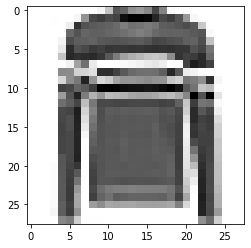

0  0  0  0  1  0  0  0  0  22 88 1881721321251411991439  0  0  0  1  0  0  0  0  0  
0  0  0  1  0  0  20 13119920619620224225525525022219720618812617 0  0  0  0  0  0  
0  0  0  1  0  35 21419118317817516815016215915215817918318919518582 0  0  0  0  0  
0  0  0  0  0  17019017217717617116916215514815416917417517517718318812 0  0  0  0  
0  0  0  0  25 19418017817418418718918718418118920019719319017817519490 0  0  0  0  
0  0  0  0  42 2181911972082042112092102122112142152132142112111912001580  0  0  0  
0  0  0  0  88 22121521721921118515011810799 88 83 90 1352122032072191690  0  0  0  
0  0  0  0  0  27 11816240 0  0  0  10 19 28 39 47 36 0  0  2032302202030  0  0  0  
0  0  0  0  13813671 69 54 21621720318416816316216317822118638 26 7  0  0  0  0  0  
0  0  0  0  67 13415422412966 81 11712912813213713112986 73 15715113421618 0  0  0  
0  0  0  0  20319817218320625525525024324023923523824425523818416086 98 0  0  0  0  
0  0  0  0  12218822415110512797 10010511411711711310398 11114225

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

type(X_train)

X_train.shape

plt.imshow(X_train[5], cmap='Greys')
plt.show()

y_test[0:50]

import sys

for x in X_train[5]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[5]

type(y_train)

model = Sequential()
model.add(Conv2D(32, kernel_size=(4, 2), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (4, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


modelpath="./data/model/MNIST_CNN.hdf5"


checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_train, validation_split=0.1, epochs=20, batch_size=500, verbose=0, callbacks=[early_stopping_callback,checkpointer])

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))





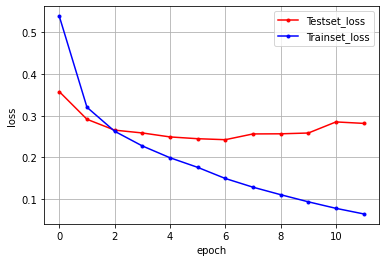

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')


plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()